In [50]:
#part 1, load data
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math as math
import scipy as sp
from functools import reduce
import itertools as it



fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [51]:
 #Report the 
    #1) Number of  images in the training set and the testing set.
    #2) Number of classes in the training set and the testing set
print('there are ',train_images.shape[0], ' in the training set.\nand',test_images.shape[0],' images in the test set')
print('\nthere are ',len(np.unique(train_labels)),'classes for training and ',len(np.unique(test_labels)),'classes for testing')
print('There should be 10 classes, so all are represented in both sets.')

print('tensor flow version',tf.__version__)

train_images = train_images / 255.0
test_images = test_images / 255.0


there are  60000  in the training set.
and 10000  images in the test set

there are  10 classes for training and  10 classes for testing
There should be 10 classes, so all are represented in both sets.
tensor flow version 1.13.1


In [52]:
#    2. Fully connected neural network (12 pts)
#Use tf.keras.layers to build the model and use the classification accuracy as your evaluation metric. 
#You can use tf.keras.layers.Flatten() to build the input layer 
#and keras.layers.Dense() to build the hidden layers. 

#In this section, you will build two fully connected neural network with 2 hidden layers.
#You can decide the number of neurons in the hidden layers yourself. 

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Stratified split 20% of the training sets as validation set to monitor the training process. 
#(the class proportion of the training set and the validation should be the same after the split). 
#Remember to set the seed to guarantee the reproducibility of the experiment.

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels,
                                                stratify=train_labels, 
                                                test_size=0.20)


class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    
    
batch_stats = CollectBatchStats()



history1 = model1.fit(X_train, y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(X_valid, y_valid),
                                  verbose=2,
                                  callbacks = [batch_stats])
history2 = model2.fit(X_train, y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(X_valid, y_valid),
                                  verbose=2,
                                  callbacks = [batch_stats])



#Please state the following reasonings for building the model:
#    1) your choice of non-linear activation function (choice from ‘sigmoid’, ‘tanh’, ‘relu’ and etc).

#Because sigmoid and tanh are almost flat away from the center, 
#they would need a high learning rate for deeper layers. Since I don't know or set the learning rate here, 
#I used RELU.

#    2) your choice of the loss function for back-propagation

#The labels are 10 catagories, not encoded in one-hot I used multi-class catagorical cross entropy


#    3) your choice of the optimizer (‘sgd’, ‘adagra’, ‘adam’ and etc.). You can start with the default learning
#rate with the optimizer of your choice.  
#This part can be completed by using the mathematical reasonings or 
#the experiments results between different choices of the model structure. 

#adagrad is for spase data, where some labels  are much rarer than others. 
#That is not the case with fashion MNST. Also learning rate can get too small, 
#but my NN are probably to shallow for this to matter
#RMSprop is for recurant NN, which this is not.
#sgd helps to avoid local minimum.
#adam is simillar, but 'slows' the occilation of SGD by useing mean and variance.
#It " is straightforward to implement, is computationally efficient, 
#has little memory requirements, is invariant to diagonal rescaling of the gradients,  is straightforward to implement, is computationally efficient, has little memory requirements, is invariant to diagonal rescaling of the gradients, and is well suited for problems that are large in terms of data and/or parameters.
#and is well suited for problems that are large in terms of data and/or parameters."
#so I used ADAM


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 1s - loss: 0.8456 - acc: 0.7179 - val_loss: 0.5199 - val_acc: 0.8242
Epoch 2/20
 - 0s - loss: 0.4786 - acc: 0.8337 - val_loss: 0.4532 - val_acc: 0.8458
Epoch 3/20
 - 0s - loss: 0.4256 - acc: 0.8523 - val_loss: 0.4218 - val_acc: 0.8551
Epoch 4/20
 - 0s - loss: 0.3960 - acc: 0.8613 - val_loss: 0.4318 - val_acc: 0.8528
Epoch 5/20
 - 0s - loss: 0.3818 - acc: 0.8676 - val_loss: 0.4047 - val_acc: 0.8587
Epoch 6/20
 - 0s - loss: 0.3654 - acc: 0.8735 - val_loss: 0.3885 - val_acc: 0.8657
Epoch 7/20
 - 1s - loss: 0.3517 - acc: 0.8767 - val_loss: 0.3855 - val_acc: 0.8662
Epoch 8/20
 - 0s - loss: 0.3409 - acc: 0.8804 - val_loss: 0.3701 - val_acc: 0.8702
Epoch 9/20
 - 0s - loss: 0.3312 - acc: 0.8836 - val_loss: 0.3631 - val_acc: 0.8750
Epoch 10/20
 - 0s - loss: 0.3224 - acc: 0.8854 - val_loss: 0.3555 - val_acc: 0.8748
Epoch 11/20
 - 0s - loss: 0.3184 - acc: 0.8856 - val_loss: 0.3568 - val_acc: 0.8757
Epoch 12/20
 - 1s - loss: 0.3104 - 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None
model 1,2 hidden layers of 64 relu, has 55,050. The first layer just takes the input and makes it a 1D array.
the first hidden layer has a parameter for all of these 784 input for each of the 64 nodes.
the second hidden layer learns a weight for each of the 64 in t

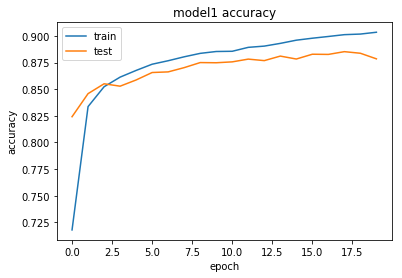

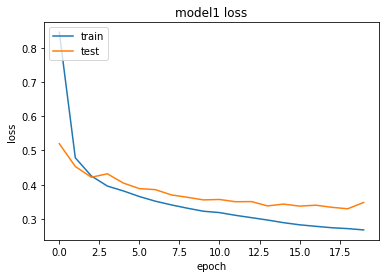

In [53]:
#Answer the following questions regarding your model training:
#    1) The number parameters of each layer (use model.summary()) and how the number of parameters is derived.
-

In [54]:
model1.save('my_model_1.h5')
model2.save('my_model_2.h5')

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


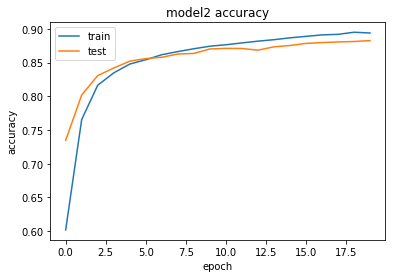

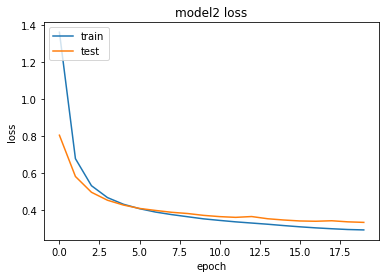

In [55]:

# list all data in history2
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [83]:

prediction1 = model1.predict_classes(test_images)
test_accuracy = tf.metrics.accuracy(prediction, test_labels)
acc1 = []
print('for model1: ')
for (s, w) in zip(test_labels,prediction1): 
    print(s,w, 'Are equal? ', int(s == w))
    acc1.append(int(s==w))



for model1: 
9 9 Are equal?  1
2 2 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
6 6 Are equal?  1
1 1 Are equal?  1
4 4 Are equal?  1
6 6 Are equal?  1
5 5 Are equal?  1
7 7 Are equal?  1
4 4 Are equal?  1
5 5 Are equal?  1
7 7 Are equal?  1
3 3 Are equal?  1
4 4 Are equal?  1
1 1 Are equal?  1
2 2 Are equal?  1
4 2 Are equal?  0
8 8 Are equal?  1
0 0 Are equal?  1
2 2 Are equal?  1
5 5 Are equal?  1
7 7 Are equal?  1
9 5 Are equal?  0
1 1 Are equal?  1
4 2 Are equal?  0
6 6 Are equal?  1
0 0 Are equal?  1
9 9 Are equal?  1
3 3 Are equal?  1
8 8 Are equal?  1
8 8 Are equal?  1
3 3 Are equal?  1
3 3 Are equal?  1
8 8 Are equal?  1
0 0 Are equal?  1
7 7 Are equal?  1
5 5 Are equal?  1
7 7 Are equal?  1
9 9 Are equal?  1
6 0 Are equal?  0
1 1 Are equal?  1
3 6 Are equal?  0
7 7 Are equal?  1
6 6 Are equal?  1
7 7 Are equal?  1
2 2 Are equal?  1
1 1 Are equal?  1
2 2 Are equal?  1
2 6 Are equal?  0
4 4 Are equal?  1
4 2 Are equal?  0
5 5 Are equal?  1
8 8 Are equal?  1
2 2 Are equal? 

0 0 Are equal?  1
7 7 Are equal?  1
0 0 Are equal?  1
2 2 Are equal?  1
2 2 Are equal?  1
5 5 Are equal?  1
3 3 Are equal?  1
5 5 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
7 7 Are equal?  1
7 7 Are equal?  1
6 6 Are equal?  1
3 0 Are equal?  0
0 6 Are equal?  0
4 4 Are equal?  1
2 2 Are equal?  1
8 8 Are equal?  1
6 6 Are equal?  1
3 3 Are equal?  1
1 1 Are equal?  1
4 4 Are equal?  1
9 9 Are equal?  1
9 9 Are equal?  1
4 4 Are equal?  1
5 5 Are equal?  1
2 2 Are equal?  1
2 2 Are equal?  1
7 7 Are equal?  1
8 8 Are equal?  1
0 0 Are equal?  1
7 7 Are equal?  1
9 9 Are equal?  1
1 1 Are equal?  1
2 2 Are equal?  1
9 9 Are equal?  1
4 4 Are equal?  1
7 7 Are equal?  1
3 3 Are equal?  1
4 4 Are equal?  1
3 3 Are equal?  1
3 3 Are equal?  1
1 1 Are equal?  1
8 8 Are equal?  1
8 8 Are equal?  1
5 7 Are equal?  0
3 3 Are equal?  1
8 8 Are equal?  1
6 0 Are equal?  0
3 3 Are equal?  1
4 4 Are equal?  1
3 3 Are equal?  1
2 6 Are equal?  0
0 0 Are equal?  1
2 2 Are equal?  1
7 7 Are eq

8 8 Are equal?  1
7 7 Are equal?  1
6 6 Are equal?  1
5 5 Are equal?  1
1 3 Are equal?  0
7 7 Are equal?  1
0 2 Are equal?  0
0 0 Are equal?  1
9 9 Are equal?  1
2 2 Are equal?  1
1 1 Are equal?  1
6 6 Are equal?  1
2 2 Are equal?  1
2 2 Are equal?  1
5 5 Are equal?  1
8 8 Are equal?  1
5 5 Are equal?  1
2 2 Are equal?  1
7 9 Are equal?  0
8 8 Are equal?  1
4 4 Are equal?  1
0 0 Are equal?  1
9 9 Are equal?  1
0 0 Are equal?  1
8 8 Are equal?  1
1 1 Are equal?  1
3 3 Are equal?  1
8 8 Are equal?  1
2 2 Are equal?  1
8 8 Are equal?  1
2 2 Are equal?  1
0 0 Are equal?  1
6 6 Are equal?  1
3 3 Are equal?  1
8 8 Are equal?  1
7 7 Are equal?  1
8 8 Are equal?  1
2 2 Are equal?  1
6 2 Are equal?  0
6 0 Are equal?  0
6 6 Are equal?  1
0 0 Are equal?  1
4 4 Are equal?  1
5 5 Are equal?  1
3 3 Are equal?  1
4 4 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
9 9 Are equal?  1
7 7 Are equal?  1
0 3 Are equal?  0
6 4 Are equal?  0
2 2 Are equal?  1
1 1 Are equal?  1
4 4 Are equal?  1
2 2 Are eq

2 2 Are equal?  1
8 8 Are equal?  1
4 4 Are equal?  1
9 9 Are equal?  1
6 0 Are equal?  0
1 1 Are equal?  1
6 6 Are equal?  1
0 0 Are equal?  1
5 5 Are equal?  1
8 0 Are equal?  0
1 1 Are equal?  1
9 9 Are equal?  1
3 3 Are equal?  1
0 6 Are equal?  0
8 8 Are equal?  1
3 3 Are equal?  1
8 8 Are equal?  1
4 4 Are equal?  1
2 2 Are equal?  1
5 5 Are equal?  1
6 6 Are equal?  1
9 9 Are equal?  1
0 0 Are equal?  1
1 1 Are equal?  1
4 4 Are equal?  1
0 0 Are equal?  1
7 7 Are equal?  1
9 9 Are equal?  1
0 0 Are equal?  1
1 1 Are equal?  1
3 3 Are equal?  1
9 9 Are equal?  1
5 5 Are equal?  1
1 1 Are equal?  1
4 4 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
4 3 Are equal?  0
8 8 Are equal?  1
3 3 Are equal?  1
9 9 Are equal?  1
5 5 Are equal?  1
4 4 Are equal?  1
4 4 Are equal?  1
3 3 Are equal?  1
7 7 Are equal?  1
7 7 Are equal?  1
7 7 Are equal?  1
2 2 Are equal?  1
3 3 Are equal?  1
9 9 Are equal?  1
1 1 Are equal?  1
9 9 Are equal?  1
4 4 Are equal?  1
4 4 Are equal?  1
0 0 Are eq

4 4 Are equal?  1
9 9 Are equal?  1
5 5 Are equal?  1
2 2 Are equal?  1
4 4 Are equal?  1
6 4 Are equal?  0
4 4 Are equal?  1
6 0 Are equal?  0
1 1 Are equal?  1
5 5 Are equal?  1
2 2 Are equal?  1
7 7 Are equal?  1
8 8 Are equal?  1
6 6 Are equal?  1
7 7 Are equal?  1
7 7 Are equal?  1
0 0 Are equal?  1
8 8 Are equal?  1
4 4 Are equal?  1
3 0 Are equal?  0
6 6 Are equal?  1
9 9 Are equal?  1
1 1 Are equal?  1
2 2 Are equal?  1
1 1 Are equal?  1
7 7 Are equal?  1
4 4 Are equal?  1
3 3 Are equal?  1
4 2 Are equal?  0
9 9 Are equal?  1
9 9 Are equal?  1
2 2 Are equal?  1
2 4 Are equal?  0
4 4 Are equal?  1
3 3 Are equal?  1
0 0 Are equal?  1
5 5 Are equal?  1
7 7 Are equal?  1
5 5 Are equal?  1
2 2 Are equal?  1
7 7 Are equal?  1
8 8 Are equal?  1
9 9 Are equal?  1
9 9 Are equal?  1
2 2 Are equal?  1
7 7 Are equal?  1
8 8 Are equal?  1
7 7 Are equal?  1
7 7 Are equal?  1
5 5 Are equal?  1
8 8 Are equal?  1
7 7 Are equal?  1
6 6 Are equal?  1
6 6 Are equal?  1
9 9 Are equal?  1
0 0 Are eq

3 3 Are equal?  1
5 5 Are equal?  1
0 0 Are equal?  1
3 3 Are equal?  1
0 0 Are equal?  1
5 5 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
8 8 Are equal?  1
2 2 Are equal?  1
5 5 Are equal?  1
3 3 Are equal?  1
5 5 Are equal?  1
1 1 Are equal?  1
4 4 Are equal?  1
4 2 Are equal?  0
3 3 Are equal?  1
1 1 Are equal?  1
2 2 Are equal?  1
7 7 Are equal?  1
9 9 Are equal?  1
6 6 Are equal?  1
3 3 Are equal?  1
8 8 Are equal?  1
5 5 Are equal?  1
6 2 Are equal?  0
6 4 Are equal?  0
9 5 Are equal?  0
1 1 Are equal?  1
5 5 Are equal?  1
7 7 Are equal?  1
7 7 Are equal?  1
4 6 Are equal?  0
2 2 Are equal?  1
2 2 Are equal?  1
7 7 Are equal?  1
5 5 Are equal?  1
4 4 Are equal?  1
1 1 Are equal?  1
5 5 Are equal?  1
7 7 Are equal?  1
7 7 Are equal?  1
8 8 Are equal?  1
2 2 Are equal?  1
8 8 Are equal?  1
3 3 Are equal?  1
7 7 Are equal?  1
4 4 Are equal?  1
6 0 Are equal?  0
2 2 Are equal?  1
9 9 Are equal?  1
9 9 Are equal?  1
0 0 Are equal?  1
0 0 Are equal?  1
7 7 Are equal?  1
3 3 Are eq

2 2 Are equal?  1
8 8 Are equal?  1
0 0 Are equal?  1
1 1 Are equal?  1
5 5 Are equal?  1
3 3 Are equal?  1
8 8 Are equal?  1
1 1 Are equal?  1
7 7 Are equal?  1
4 6 Are equal?  0
9 9 Are equal?  1
3 3 Are equal?  1
7 7 Are equal?  1
9 9 Are equal?  1
5 5 Are equal?  1
1 1 Are equal?  1
8 8 Are equal?  1
3 3 Are equal?  1
0 0 Are equal?  1
9 9 Are equal?  1
3 0 Are equal?  0
6 0 Are equal?  0
2 2 Are equal?  1
4 4 Are equal?  1
2 2 Are equal?  1
7 7 Are equal?  1
6 6 Are equal?  1
2 0 Are equal?  0
9 9 Are equal?  1
8 8 Are equal?  1
8 8 Are equal?  1
1 1 Are equal?  1
5 5 Are equal?  1
7 7 Are equal?  1
7 7 Are equal?  1
1 1 Are equal?  1
9 7 Are equal?  0
5 5 Are equal?  1
4 4 Are equal?  1
1 1 Are equal?  1
0 0 Are equal?  1
7 7 Are equal?  1
8 8 Are equal?  1
7 7 Are equal?  1
3 3 Are equal?  1
7 7 Are equal?  1
6 0 Are equal?  0
2 6 Are equal?  0
5 5 Are equal?  1
5 5 Are equal?  1
4 1 Are equal?  0
6 6 Are equal?  1
7 7 Are equal?  1
2 2 Are equal?  1
6 6 Are equal?  1
3 3 Are eq

2 8 Are equal?  0
6 2 Are equal?  0
1 1 Are equal?  1
5 5 Are equal?  1
3 3 Are equal?  1
0 0 Are equal?  1
8 8 Are equal?  1
6 2 Are equal?  0
9 9 Are equal?  1
6 0 Are equal?  0
9 9 Are equal?  1
6 0 Are equal?  0
0 0 Are equal?  1
4 4 Are equal?  1
1 1 Are equal?  1
6 2 Are equal?  0
6 6 Are equal?  1
4 4 Are equal?  1
9 9 Are equal?  1
1 1 Are equal?  1
4 4 Are equal?  1
9 9 Are equal?  1
7 7 Are equal?  1
8 8 Are equal?  1
2 2 Are equal?  1
6 6 Are equal?  1
2 0 Are equal?  0
9 9 Are equal?  1
7 7 Are equal?  1
8 8 Are equal?  1
5 5 Are equal?  1
6 0 Are equal?  0
9 9 Are equal?  1
6 0 Are equal?  0
0 0 Are equal?  1
0 0 Are equal?  1
8 8 Are equal?  1
1 1 Are equal?  1
3 3 Are equal?  1
2 1 Are equal?  0
7 7 Are equal?  1
5 5 Are equal?  1
8 8 Are equal?  1
4 2 Are equal?  0
5 5 Are equal?  1
6 0 Are equal?  0
8 8 Are equal?  1
9 9 Are equal?  1
1 1 Are equal?  1
9 9 Are equal?  1
1 1 Are equal?  1
8 8 Are equal?  1
1 1 Are equal?  1
5 5 Are equal?  1


In [84]:

prediction2 = model2.predict_classes(test_images)
acc2 = []
print('for model2: ')
for (s, w) in zip(test_labels,prediction2): 
    print(s,w, 'Are equal? ', int(s == w))
    acc2.append(int(s==w))



for model2: 
9 9 Are equal?  1
2 2 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
6 6 Are equal?  1
1 1 Are equal?  1
4 4 Are equal?  1
6 6 Are equal?  1
5 5 Are equal?  1
7 7 Are equal?  1
4 4 Are equal?  1
5 5 Are equal?  1
7 5 Are equal?  0
3 3 Are equal?  1
4 4 Are equal?  1
1 1 Are equal?  1
2 2 Are equal?  1
4 2 Are equal?  0
8 8 Are equal?  1
0 0 Are equal?  1
2 2 Are equal?  1
5 5 Are equal?  1
7 7 Are equal?  1
9 7 Are equal?  0
1 1 Are equal?  1
4 2 Are equal?  0
6 6 Are equal?  1
0 0 Are equal?  1
9 9 Are equal?  1
3 3 Are equal?  1
8 8 Are equal?  1
8 8 Are equal?  1
3 3 Are equal?  1
3 3 Are equal?  1
8 8 Are equal?  1
0 0 Are equal?  1
7 7 Are equal?  1
5 5 Are equal?  1
7 7 Are equal?  1
9 9 Are equal?  1
6 0 Are equal?  0
1 1 Are equal?  1
3 6 Are equal?  0
7 7 Are equal?  1
6 6 Are equal?  1
7 7 Are equal?  1
2 2 Are equal?  1
1 1 Are equal?  1
2 2 Are equal?  1
2 6 Are equal?  0
4 4 Are equal?  1
4 2 Are equal?  0
5 5 Are equal?  1
8 8 Are equal?  1
2 2 Are equal? 

7 7 Are equal?  1
3 3 Are equal?  1
7 7 Are equal?  1
0 0 Are equal?  1
7 7 Are equal?  1
0 0 Are equal?  1
2 2 Are equal?  1
2 2 Are equal?  1
5 5 Are equal?  1
3 3 Are equal?  1
5 5 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
7 7 Are equal?  1
7 7 Are equal?  1
6 6 Are equal?  1
3 3 Are equal?  1
0 6 Are equal?  0
4 3 Are equal?  0
2 2 Are equal?  1
8 8 Are equal?  1
6 6 Are equal?  1
3 3 Are equal?  1
1 1 Are equal?  1
4 4 Are equal?  1
9 9 Are equal?  1
9 9 Are equal?  1
4 4 Are equal?  1
5 5 Are equal?  1
2 2 Are equal?  1
2 2 Are equal?  1
7 7 Are equal?  1
8 8 Are equal?  1
0 0 Are equal?  1
7 7 Are equal?  1
9 9 Are equal?  1
1 1 Are equal?  1
2 2 Are equal?  1
9 9 Are equal?  1
4 4 Are equal?  1
7 7 Are equal?  1
3 3 Are equal?  1
4 4 Are equal?  1
3 3 Are equal?  1
3 3 Are equal?  1
1 1 Are equal?  1
8 8 Are equal?  1
8 8 Are equal?  1
5 7 Are equal?  0
3 3 Are equal?  1
8 8 Are equal?  1
6 0 Are equal?  0
3 3 Are equal?  1
4 4 Are equal?  1
3 3 Are equal?  1
2 6 Are eq

5 5 Are equal?  1
9 9 Are equal?  1
5 9 Are equal?  0
5 5 Are equal?  1
3 3 Are equal?  1
0 6 Are equal?  0
7 7 Are equal?  1
8 8 Are equal?  1
4 8 Are equal?  0
5 5 Are equal?  1
1 1 Are equal?  1
6 0 Are equal?  0
4 2 Are equal?  0
2 6 Are equal?  0
4 4 Are equal?  1
4 3 Are equal?  0
7 7 Are equal?  1
7 7 Are equal?  1
9 7 Are equal?  0
7 7 Are equal?  1
2 2 Are equal?  1
5 5 Are equal?  1
8 8 Are equal?  1
5 5 Are equal?  1
8 8 Are equal?  1
5 5 Are equal?  1
3 3 Are equal?  1
0 0 Are equal?  1
9 9 Are equal?  1
7 7 Are equal?  1
2 2 Are equal?  1
0 0 Are equal?  1
6 6 Are equal?  1
8 8 Are equal?  1
4 3 Are equal?  0
0 0 Are equal?  1
7 7 Are equal?  1
3 4 Are equal?  0
7 7 Are equal?  1
6 6 Are equal?  1
8 8 Are equal?  1
4 4 Are equal?  1
7 7 Are equal?  1
0 0 Are equal?  1
0 0 Are equal?  1
4 4 Are equal?  1
0 0 Are equal?  1
6 2 Are equal?  0
7 7 Are equal?  1
8 8 Are equal?  1
1 1 Are equal?  1
3 3 Are equal?  1
8 8 Are equal?  1
1 1 Are equal?  1
7 5 Are equal?  0
3 3 Are eq

6 3 Are equal?  0
3 3 Are equal?  1
4 4 Are equal?  1
9 9 Are equal?  1
3 3 Are equal?  1
9 9 Are equal?  1
8 8 Are equal?  1
5 5 Are equal?  1
3 3 Are equal?  1
8 8 Are equal?  1
4 4 Are equal?  1
7 7 Are equal?  1
1 1 Are equal?  1
4 4 Are equal?  1
1 1 Are equal?  1
9 9 Are equal?  1
6 6 Are equal?  1
8 8 Are equal?  1
3 3 Are equal?  1
2 2 Are equal?  1
4 4 Are equal?  1
8 8 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
5 5 Are equal?  1
8 8 Are equal?  1
6 8 Are equal?  0
1 1 Are equal?  1
6 0 Are equal?  0
2 2 Are equal?  1
5 5 Are equal?  1
0 0 Are equal?  1
9 9 Are equal?  1
5 5 Are equal?  1
3 3 Are equal?  1
5 5 Are equal?  1
0 0 Are equal?  1
6 6 Are equal?  1
5 5 Are equal?  1
4 6 Are equal?  0
8 8 Are equal?  1
3 3 Are equal?  1
8 8 Are equal?  1
0 0 Are equal?  1
2 2 Are equal?  1
9 9 Are equal?  1
9 5 Are equal?  0
1 1 Are equal?  1
5 5 Are equal?  1
3 3 Are equal?  1
2 2 Are equal?  1
6 6 Are equal?  1
5 5 Are equal?  1
3 3 Are equal?  1
0 0 Are equal?  1
3 3 Are eq

9 9 Are equal?  1
2 2 Are equal?  1
0 0 Are equal?  1
1 1 Are equal?  1
5 5 Are equal?  1
0 0 Are equal?  1
7 7 Are equal?  1
8 8 Are equal?  1
0 0 Are equal?  1
0 0 Are equal?  1
9 9 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
8 8 Are equal?  1
2 4 Are equal?  0
8 8 Are equal?  1
7 9 Are equal?  0
2 2 Are equal?  1
0 0 Are equal?  1
7 7 Are equal?  1
2 2 Are equal?  1
0 0 Are equal?  1
0 0 Are equal?  1
5 5 Are equal?  1
1 1 Are equal?  1
0 6 Are equal?  0
8 8 Are equal?  1
6 2 Are equal?  0
3 3 Are equal?  1
7 7 Are equal?  1
2 6 Are equal?  0
1 1 Are equal?  1
9 9 Are equal?  1
7 7 Are equal?  1
4 6 Are equal?  0
1 1 Are equal?  1
3 3 Are equal?  1
9 9 Are equal?  1
2 2 Are equal?  1
4 4 Are equal?  1
0 0 Are equal?  1
3 3 Are equal?  1
7 7 Are equal?  1
5 5 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
9 9 Are equal?  1
5 5 Are equal?  1
1 3 Are equal?  0
5 5 Are equal?  1
4 4 Are equal?  1
6 6 Are equal?  1
6 6 Are equal?  1
1 1 Are equal?  1
5 5 Are equal?  1
2 2 Are eq

6 6 Are equal?  1
0 0 Are equal?  1
7 7 Are equal?  1
8 8 Are equal?  1
7 7 Are equal?  1
4 4 Are equal?  1
4 2 Are equal?  0
2 2 Are equal?  1
2 2 Are equal?  1
9 9 Are equal?  1
3 3 Are equal?  1
5 5 Are equal?  1
0 0 Are equal?  1
9 9 Are equal?  1
9 9 Are equal?  1
0 0 Are equal?  1
1 1 Are equal?  1
3 3 Are equal?  1
7 7 Are equal?  1
1 1 Are equal?  1
9 9 Are equal?  1
6 6 Are equal?  1
5 5 Are equal?  1
2 2 Are equal?  1
6 6 Are equal?  1
9 9 Are equal?  1
5 5 Are equal?  1
7 7 Are equal?  1
9 9 Are equal?  1
4 4 Are equal?  1
2 2 Are equal?  1
8 8 Are equal?  1
3 3 Are equal?  1
1 1 Are equal?  1
7 7 Are equal?  1
8 8 Are equal?  1
8 8 Are equal?  1
6 6 Are equal?  1
8 8 Are equal?  1
0 0 Are equal?  1
5 5 Are equal?  1
5 5 Are equal?  1
7 7 Are equal?  1
1 1 Are equal?  1
9 9 Are equal?  1
6 6 Are equal?  1
2 2 Are equal?  1
1 1 Are equal?  1
5 5 Are equal?  1
1 1 Are equal?  1
9 9 Are equal?  1
6 6 Are equal?  1
1 1 Are equal?  1
6 6 Are equal?  1
3 3 Are equal?  1
2 6 Are eq

4 4 Are equal?  1
7 7 Are equal?  1
6 4 Are equal?  0
7 7 Are equal?  1
0 0 Are equal?  1
0 8 Are equal?  0
2 6 Are equal?  0
9 9 Are equal?  1
9 7 Are equal?  0
7 7 Are equal?  1
7 7 Are equal?  1
5 5 Are equal?  1
0 0 Are equal?  1
1 1 Are equal?  1
4 2 Are equal?  0
3 3 Are equal?  1
4 4 Are equal?  1
6 6 Are equal?  1
4 2 Are equal?  0
0 0 Are equal?  1
9 9 Are equal?  1
8 8 Are equal?  1
7 7 Are equal?  1
8 8 Are equal?  1
4 4 Are equal?  1
4 2 Are equal?  0
8 8 Are equal?  1
9 9 Are equal?  1
7 9 Are equal?  0
1 1 Are equal?  1
6 6 Are equal?  1
7 7 Are equal?  1
9 9 Are equal?  1
9 9 Are equal?  1
0 0 Are equal?  1
1 1 Are equal?  1
5 5 Are equal?  1
1 1 Are equal?  1
1 1 Are equal?  1
3 3 Are equal?  1
6 6 Are equal?  1
7 7 Are equal?  1
9 9 Are equal?  1
8 8 Are equal?  1
3 3 Are equal?  1
3 3 Are equal?  1
8 8 Are equal?  1
5 5 Are equal?  1
2 2 Are equal?  1
4 4 Are equal?  1
3 3 Are equal?  1
6 6 Are equal?  1
8 8 Are equal?  1
6 0 Are equal?  0
9 9 Are equal?  1
0 6 Are eq

In [86]:
print('model1 has a test accuracy of ', sum(acc1)/len(acc1), '%')
print('model2 has a test accuracy of ', sum(acc2)/len(acc2), '%')
print('the validiation accuracy was 88%, so this is a bit overfit. but not too bad.')

model1 has a test accuracy of  0.8723 %
model2 has a test accuracy of  0.8726 %
the validiation accuracy was 88%, so this is a bit overfit. but not too bad.


In [89]:
#2.3
#Add dropout layer (tf.keras.layers.Dropout()) or l1/l2 regularization 
#and draw the learning curve again in the same plot of 2). 

model1d = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2d = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model1d.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2d.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])






history1d = model1d.fit(X_train, y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(X_valid, y_valid),
                                  verbose=2,
                                  callbacks = [batch_stats])
history2d = model2d.fit(X_train, y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(X_valid, y_valid),
                                  verbose=2,
                                  callbacks = [batch_stats])



Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 1s - loss: 1.1831 - acc: 0.5765 - val_loss: 0.6363 - val_acc: 0.7697
Epoch 2/20
 - 1s - loss: 0.6880 - acc: 0.7545 - val_loss: 0.5042 - val_acc: 0.8293
Epoch 3/20
 - 2s - loss: 0.5843 - acc: 0.7943 - val_loss: 0.4600 - val_acc: 0.8391
Epoch 4/20
 - 2s - loss: 0.5410 - acc: 0.8081 - val_loss: 0.4350 - val_acc: 0.8462
Epoch 5/20
 - 2s - loss: 0.5103 - acc: 0.8173 - val_loss: 0.4225 - val_acc: 0.8516
Epoch 6/20
 - 2s - loss: 0.4920 - acc: 0.8236 - val_loss: 0.4275 - val_acc: 0.8488
Epoch 7/20
 - 1s - loss: 0.4764 - acc: 0.8310 - val_loss: 0.4011 - val_acc: 0.8587
Epoch 8/20
 - 2s - loss: 0.4624 - acc: 0.8328 - val_loss: 0.3958 - val_acc: 0.8618
Epoch 9/20
 - 2s - loss: 0.4542 - acc: 0.8376 - val_loss: 0.3889 - val_acc: 0.8622
Epoch 10/20
 - 2s - loss: 0.4424 - acc: 0.8399 - val_loss: 0.3877 - val_acc: 0.8643
Epoch 11/20
 - 1s - loss: 0.4383 - acc: 0.8421 - val_loss: 0.3787 - val_acc: 0.8661
Epoch 12/20
 - 1s - loss: 0.4337 - 

Question 2.3


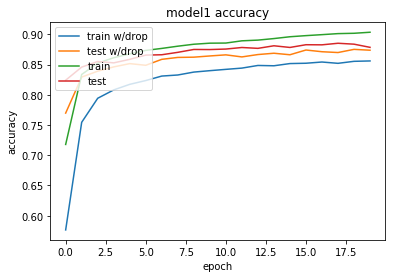

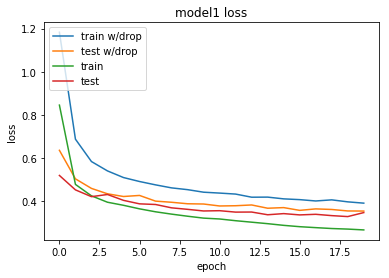

In [92]:
#print the loss, accuracy curves


print('Question 2.3')
# summarize history for accuracy
plt.plot(history1d.history['acc'])
plt.plot(history1d.history['val_acc'])
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train w/drop', 'test w/drop', 'train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1d.history['loss'])
plt.plot(history1d.history['val_loss'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train w/drop', 'test w/drop', 'train', 'test'], loc='upper left')
plt.show()







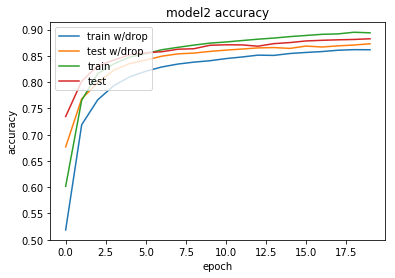

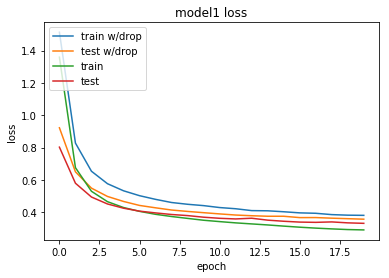

In [93]:
# summarize history for accuracy
plt.plot(history2d.history['acc'])
plt.plot(history2d.history['val_acc'])
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train w/drop', 'test w/drop', 'train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2d.history['loss'])
plt.plot(history2d.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train w/drop', 'test w/drop', 'train', 'test'], loc='upper left')
plt.show()






In [98]:
#State whether you have observed the alleviation of the overfitting. 
#Report the test accuracy.

prediction1d = model1d.predict_classes(test_images)
acc1d = []
#print('for model1d: ')
for (s, w) in zip(test_labels,prediction1d): 
    #print(s,w, 'Are equal? ', int(s == w))
    acc1d.append(int(s==w))

prediction2d = model2d.predict_classes(test_images)
acc2d = []
#print('for model2d: ')
for (s, w) in zip(test_labels,prediction2d): 
    #print(s,w, 'Are equal? ', int(s == w))
    acc2d.append(int(s==w))

print('model1 has a test accuracy of ', sum(acc1d)/len(acc1d), '%')
print('model2 has a test accuracy of ', sum(acc2d)/len(acc2d), '%')
print('the validiation accuracy was ~87.4%, so this is still a bit overfit. In theory it should be less overfit.')
print('As for the prior case, the large network did better and here it is not much worse, I wonder if I have too few nodes to begin with. That would already avoid overfitting, and then droping more would just make things worse?')



model1 has a test accuracy of  0.8654 %
model2 has a test accuracy of  0.8609 %
the validiation accuracy was ~87.4%, so this is still a bit overfit. In theory it should be less overfit.
As for the prior case, the large network did better and here it is not much worse, I wonder if I have too few nodes to begin with. That would already avoid overfitting, and then droping more would just make things worse?


In [99]:
#Save your choice of the trained model into a HDF5 file and submit it with your report. (model.save('my_model_1.h5'))
model1d.save('my_model_1d.h5')
model2d.save('my_model_2d.h5')

In [166]:
print('QUESTION 3')
#    3. Convolutional neural network (CNN) (7 pts)
#In this section, you will build a convolutional neural network with the architecture of your choice.
#The focus will not be put on hyper-parameter tuning since the computation burden is high for a personal computer. 
#You will use the same set of validation data as in part 2 to monitor your training process.

#A sample architecture of a convolutional neural network:
#Conv2D - MaxPooling2D - Conv2D - MaxPooling2D – Flatten – Dense – Dense(output layer)

#Note:
#You can simplify this architecture if you feel the computation is too slow in your computer.
#You can also add more fancy architecture to achieve a better performance if you have good computation resources.
#The reported performance of the training will not be used as the grading criteria.


modelc = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(64, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])




modelc.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])


QUESTION 3


In [167]:

print(modelc.summary())




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dense_101 (Dense)            (None, 2, 2, 1000)        65000     
_________________________________________________________________
dense_102 (Dense)            (None, 2, 2, 10)          10010     
Total para

In [188]:
x_shaped = tf.reshape(X_train, [-1, 28, 28, 1])
x_train = tf.expand_dims(X_train, 3)

historyc = modelc.fit(x_train, y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(X_valid, y_valid),
                                  verbose=2,
                                  callbacks = [batch_stats],
                                  steps_per_epoch = 20)

ValueError: Error when checking input: expected conv2d_60_input to have 4 dimensions, but got array with shape (12000, 28, 28)

In [182]:
x_shaped

<tf.Tensor 'Reshape_14:0' shape=(48000, 28, 28, 1) dtype=float64>

In [187]:
x_train

<tf.Tensor 'ExpandDims_4:0' shape=(48000, 28, 28, 1) dtype=float64>

In [189]:
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

Using TensorFlow backend.


[INFO] loading Fashion MNIST...
[INFO] compiling model...
[INFO] training model...
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 302s 5ms/step - loss: 0.5308 - acc: 0.8215 - val_loss: 0.4120 - val_acc: 0.8517
Epoch 2/25
60000/60000 [==============================] - 297s 5ms/step - loss: 0.3372 - acc: 0.8798 - val_loss: 0.2831 - val_acc: 0.9025
Epoch 3/25
60000/60000 [==============================] - 300s 5ms/step - loss: 0.2898 - acc: 0.8965 - val_loss: 0.2481 - val_acc: 0.9123
Epoch 4/25
60000/60000 [==============================] - 296s 5ms/step - loss: 0.2672 - acc: 0.9034 - val_loss: 0.2323 - val_acc: 0.9149
Epoch 5/25
60000/60000 [==============================] - 229s 4ms/step - loss: 0.2502 - acc: 0.9099 - val_loss: 0.2318 - val_acc: 0.9167
Epoch 6/25
60000/60000 [==============================] - 281s 5ms/step - loss: 0.2371 - acc: 0.9134 - val_loss: 0.2262 - val_acc

NameError: name 'cv2' is not defined

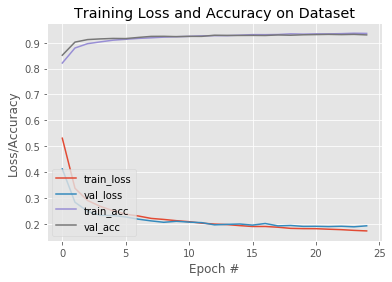

In [199]:
#FOLLOWING DIFFRENT TUTORIAL AS THERE WERE INPUT DIMENSION PROBLEMS I COULD NOT WORK OUT 


# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
 
class MiniVGGNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1
 
		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1
		# first CONV => RELU => CONV => RELU => POOL layer set
		model.add(Conv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
 
		# second CONV => RELU => CONV => RELU => POOL layer set
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
 
		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(512))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))
 
		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))
 
		# return the constructed network architecture
		return model
    
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
#from pyimagesearch.minivggnet import MiniVGGNet
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras import backend as K
#from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
#import cv2
 
# initialize the number of epochs to train for, base learning rate,
# and batch size
NUM_EPOCHS = 25
INIT_LR = 1e-2
BS = 32
# grab the Fashion MNIST dataset (if this is your first time running
# this the dataset will be automatically downloaded)
print("[INFO] loading Fashion MNIST...")
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
 
# if we are using "channels first" ordering, then reshape the design
# matrix such that the matrix is:
# 	num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
	trainX = trainX.reshape((trainX.shape[0], 1, 28, 28))
	testX = testX.reshape((testX.shape[0], 1, 28, 28))
 
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))

# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
 
# one-hot encode the training and testing labels
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)
 
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
model = MiniVGGNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
 
# train the network
print("[INFO] training model...")
H = model.fit(trainX, trainY,
	validation_data=(testX, testY),
	batch_size=BS, epochs=NUM_EPOCHS)

# make predictions on the test set
preds = model.predict(testX)
 
# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1),
	target_names=labelNames))
 
# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

# initialize our list of output images
images = []
 

In [201]:







#Answer the following questions regarding your model training:
#    1) The number parameters of each layer (use model.summary()). 
#Compare the result with the fully connected neural network. State the advantage of the CNN.
print('the CNN')
print(model.summary())
print('the smallest/best test accuracy model:')
print(model1.summary())
print('as the CNN does not have the layers take all values as input, but only a small neighborhood, it will have to learn fewer paramters per layer. However, here it has many more layers')

#    2) Plot the learning curve (training  and validation loss versus the epoch; training  and validation accuracy versus the epoch). State whether you have observed overfitting. Report the test accuracy.
print('from the curves seen above, it does not appear overfit noticiably. The loss for validation becomes worse than training after epoch 15. But this is barely noticable.')
#    3) (optional +3 points) State whether you faced the overfitting problem and propose the possible workaround. Experiment with your proposed method and add the learning curve to the plot of 2). Report the test accuracy.
print('I trained for relativly few epochs, so this probably helped me avoid overfitting. Other ways to avoid overfitting are by having a small network, regulrization penelties on the parameters, and drop out so only random subsets of nodes are trained each epoch.')    
print('the test accuracy above is in the table/matrix above. For some catagories it is better, but averages to 93% ')
#Save your choice of the trained model into a HDF5 file and submit it with your report. 
model.save('my_model_CNN.h5')


the CNN
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
__

NameError: name 'inputShape' is not defined